In [197]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Exploratory and Analysis

In [164]:
dict_type = {
    "sex": "category",
    "smoker": "category",
    "day": "category",
    "time": "category"
}

# read data
df = pd.read_csv("./data/tips.csv", dtype = dict_type)

# print first 5 rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [165]:
# info about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


In [166]:
# dtypes of columns
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [167]:
# checking for missing values
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [168]:
# checking for duplicates
df.duplicated().sum()

1

In [169]:
# removing duplicates
df = df.drop_duplicates()

# checking for duplicates one last time
df.duplicated().sum()

0

In [170]:
# checking categories in each categorical column
categorical_cols = list(df.select_dtypes("category").columns)

for col in categorical_cols:
    print(f"Categories in {col} are {list(df[col].cat.categories)}")

Categories in sex are ['Female', 'Male']
Categories in smoker are ['No', 'Yes']
Categories in day are ['Fri', 'Sat', 'Sun', 'Thur']
Categories in time are ['Dinner', 'Lunch']


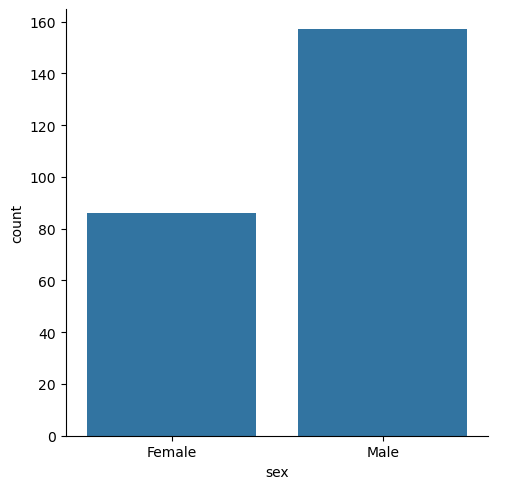

In [171]:
# visualize the gender that has the most common tips given
sns.catplot(x = "sex", data = df, kind = "count")
plt.show()

Number of Men tend to give tips is greater than women

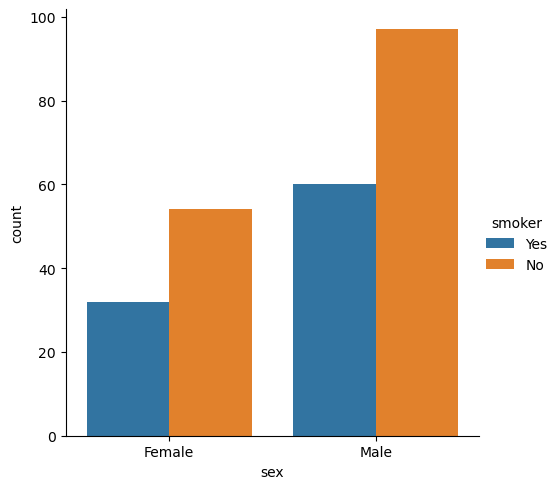

In [172]:
# given whether gender is a smoker or not
sns.catplot(x = "sex", data = df, kind = "count", hue = "smoker", hue_order = {"Yes", "No"})
plt.show()

In [173]:
# average tips given by gender impacted by being smoker or not
avg_tips_per_gender = df.groupby(["sex", "smoker"])["tip"].mean()
avg_tips_per_gender

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12676\3465760010.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tips_per_gender = df.groupby(["sex", "smoker"])["tip"].mean()


sex     smoker
Female  No        2.773519
        Yes       2.960625
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64

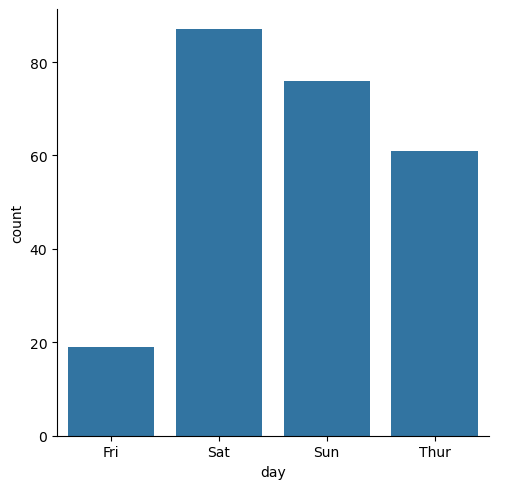

In [174]:
# Day that is mostly to be given tips at
sns.catplot(x = "day", data = df, kind = "count")
plt.show()

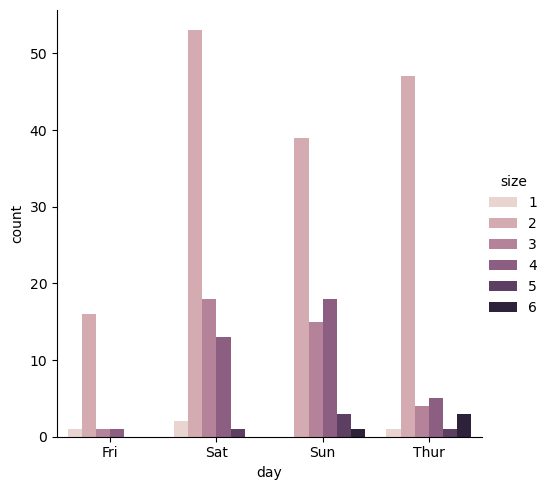

In [175]:
# Day that is mostly to be given tips at given size of people
sns.catplot(x = "day", data = df, kind = "count", hue = "size")
plt.show()

Saturday is the most day people tend to give tips compared to the other days, and the group which tends to give tips frequently is group of 2 people and when the group size increases the propapility of them giving tips decreases

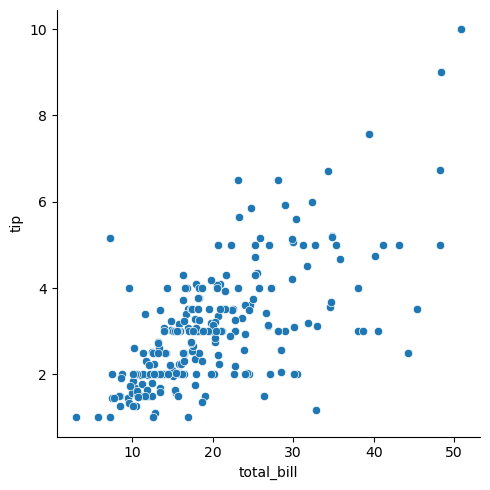

In [176]:
# Relationship between total bill and tip given
sns.relplot(x = "total_bill", y = "tip", data = df, kind = "scatter")
plt.show()

Positive correlation between group size and tips given as when group size increases the tip given increase

In [177]:
# Tip percentage to Total bill
df["tip_percent"] = (df["tip"] / df["total_bill"]) * 100
df[["total_bill","tip","tip_percent"]].head()

,total_bill,tip,tip_percent
0,16.99,1.01,5.944673
1,10.34,1.66,16.054159
2,21.01,3.50,16.658734
3,23.68,3.31,13.978041
4,24.59,3.61,14.680765


In [178]:
df["tip_percent"].describe()

count    243.000000
mean      16.083121
std        6.119662
min        3.563814
25%       12.883281
50%       15.521855
75%       19.174638
max       71.034483
Name: tip_percent, dtype: float64

In [179]:
# Avg tip percentge to total_bill per Group size
avg_tip_percent_gs = df.groupby("size")["tip_percent"].mean()
avg_tip_percent_gs

size
1    21.729202
2    16.579579
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: tip_percent, dtype: float64

Larger Groups tends to tip more in total but the tip percentage is less than when group size is small 

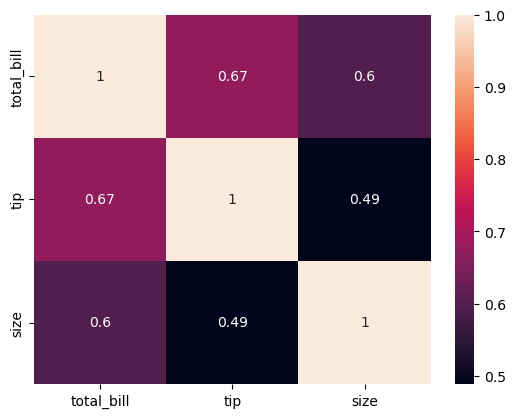

In [180]:
# correlation between total bill, tip and size
sns.heatmap(df[["total_bill", "tip", "size"]].corr(), annot = True)
plt.show()

From given heatmap we can derive that the correlation between Tip and Group Size is Medium Direct correlation so that Tip is more likely to be given when total bill increases as the Relation between both is Strong Direct Correlation 

In [181]:
# What day tends to have higher average tip given per day
avg_tip_per_day = df.groupby("day")["tip"].mean()
avg_tip_per_day

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12676\261004158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per_day = df.groupby("day")["tip"].mean()


day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.784098
Name: tip, dtype: float64

Sunday has the highest average tip given per day (3.25) and they tend to tip more on weekends

In [182]:
# group size influence per day
avg_gs_per_day = df.groupby("day")["size"].mean()
avg_gs_per_day

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12676\364847705.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gs_per_day = df.groupby("day")["size"].mean()


day
Fri     2.105263
Sat     2.517241
Sun     2.842105
Thur    2.459016
Name: size, dtype: float64

Larger groups tends to attend at weekends (Sunday and Saturday)

In [183]:
# quich summary stats
df.describe()

,total_bill,tip,size,tip_percent
count,243.000000,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016,16.083121
std,8.910071,1.385002,0.952356,6.119662
min,3.070000,1.000000,1.000000,3.563814
25%,13.380000,2.000000,2.000000,12.883281
50%,17.810000,2.920000,2.000000,15.521855
75%,24.175000,3.575000,3.000000,19.174638
max,50.810000,10.000000,6.000000,71.034483


Values in each Feature differs in range as Size ranges from (1 - 6), Tip (1 - 10) and Total bill (3 - 50)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


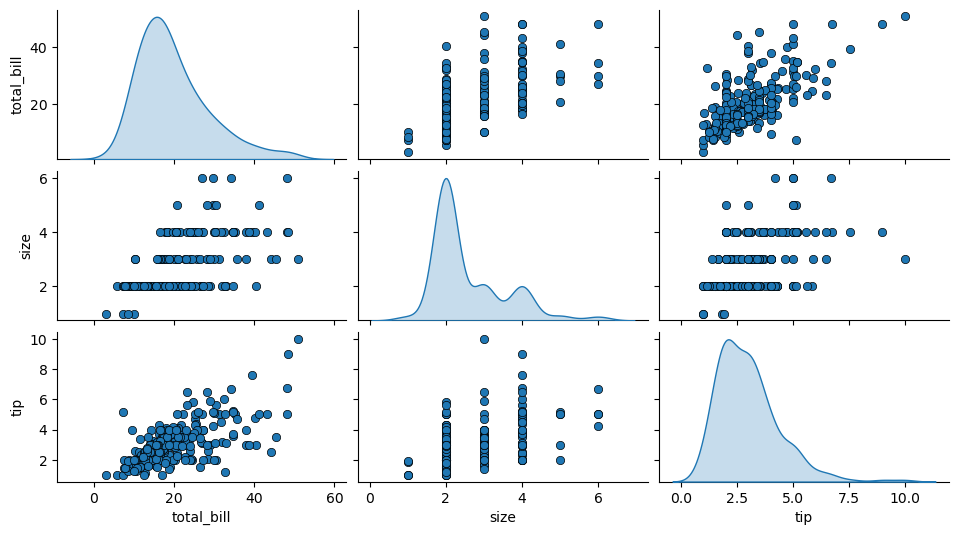

In [184]:
# Pairplot to viualize the relations and distributions of numerical features
cols_viz = ['total_bill', 'size', "tip"]
pp = sns.pairplot(df[cols_viz], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

plt.show()

# Data preparation

we will perform feature engineering as Categorical features will be converted to binary vectors before being fed to The model, the method will be used is One-Hot encoding 

In [185]:
# selecting numerical features
numerical_features = df.select_dtypes(include=['number'])

# selecting categorical features
categorical_features = df.select_dtypes(include=['category'])

# convert categorical features into one-hot encoded vectors (true / false)
categorical_df = pd.get_dummies(categorical_features, drop_first=True)

# Concatenate numerical and categorical features
df = pd.concat([numerical_features, categorical_df], axis=1)

df.head()

,total_bill,tip,size,tip_percent,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,5.944673,False,False,False,True,False,False
1,10.34,1.66,3,16.054159,True,False,False,True,False,False
2,21.01,3.50,3,16.658734,True,False,False,True,False,False
3,23.68,3.31,2,13.978041,True,False,False,True,False,False
4,24.59,3.61,4,14.680765,False,False,False,True,False,False


In [187]:
# convert boolean columns to integers (0/1)
df = df.map(lambda x: int(x) if isinstance(x, bool) else x)
# displaying first 5 rows to make sure our conversion is correct
df.head()

,total_bill,tip,size,tip_percent,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,5.944673,0,0,0,1,0,0
1,10.34,1.66,3,16.054159,1,0,0,1,0,0
2,21.01,3.50,3,16.658734,1,0,0,1,0,0
3,23.68,3.31,2,13.978041,1,0,0,1,0,0
4,24.59,3.61,4,14.680765,0,0,0,1,0,0


## Splitting data into Features and Target

In [211]:
# removing tip_percent and tip from input features
X = df.drop(["tip_percent", "tip"], axis = 1)
Y = df["tip"]

In [196]:
# convert variables to torch tensors
X_t = torch.from_numpy(X.to_numpy()).float()
Y_t = torch.from_numpy(Y.to_numpy()).float().unsqueeze(1)

print(X_t.shape) # m X f
print(Y_t.shape) # m X f

torch.Size([243, 8])
torch.Size([243, 1])


In [198]:
# splitting data into train and test 
x_train, x_test, y_train, y_test = train_test_split(X_t, Y_t, test_size = 0.2, random_state = 42)

In [205]:
print(f"X train shape after splitting {x_train.shape}") # m X f
print(f"Y train shape after splitting {y_train.shape}") # m X f

X train shape after splitting torch.Size([194, 8])
Y train shape after splitting torch.Size([194, 1])


In [209]:
# Model class
class MultiLinearRegression(nn.Module):
    def __init__(self, inp, out):
        super(MultiLinearRegression, self).__init__()
        self.linear = nn.Linear(inp, out)

    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat

In [261]:
in_f = X.columns.shape[0] # 8 features
out_f = 1 # 1 output
# Model intialization
model = MultiLinearRegression(in_f, out_f)

In [262]:
# Loss function
criterion = nn.MSELoss()
# SGD Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

## Model Training

epoch 0, loss 81.85021209716797
epoch 10, loss 1.0603761672973633
epoch 20, loss 1.0596656799316406
epoch 30, loss 1.0589654445648193
epoch 40, loss 1.058275818824768
epoch 50, loss 1.057596206665039


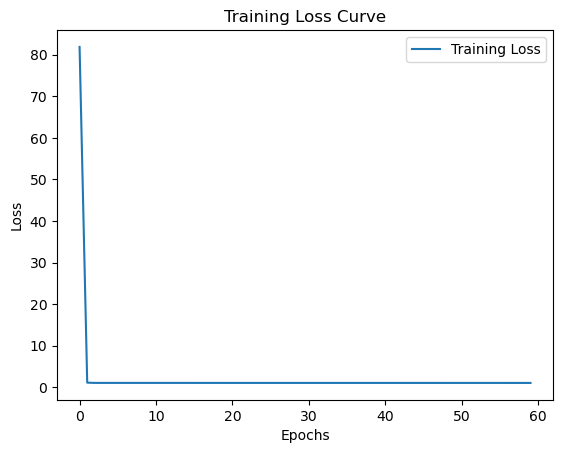

In [263]:
EPOCHS = 60
losses = []  # Store losses
for epoch in range(EPOCHS):
    model.train()
    # clear gradients from previous epoch
    optimizer.zero_grad()
    # getting the predicted output
    y_hat = model(x_train)
    # compute loss between predicted and target output
    loss = criterion(y_hat, y_train)
    # storing loss to the losses list
    losses.append(loss.item())
    # compute gradients w.r.t each parameter
    loss.backward()
    # update parameters
    optimizer.step()

    # display metrics after 10 epochs
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

plt.plot(range(EPOCHS), losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

## Model evaluation

In [294]:
model.eval()
with torch.no_grad(): # get rid of gradient computation during test phase
    output = model(x_test)
print(f"Predicted tip for {x_test[0]} is {round(float(output[0]), 2)}")

Predicted tip for tensor([19.8200,  2.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000]) is 2.51


## Evaluating on new input

In [295]:
new_input = {
    "total_bill": 85,
    "size": 6,           
    "sex": "Femle",       
    "smoker": "No",     
    "day": "Sun",        
    "time": "Dinner"      
}

# convert to DataFrame
input_df = pd.DataFrame([new_input])

We will apply OHE on newly added inputs to match inputs used while the training phase

In [296]:
categorical_columns = ['sex', 'smoker', 'day', 'time']
input_df = pd.get_dummies(input_df, columns=categorical_columns)
input_df = input_df.map(lambda x: int(x) if isinstance(x, bool) else x)
input_df

,total_bill,size,sex_Femle,smoker_No,day_Sun,time_Dinner
0,85,6,1,1,1,1


No the dataframe missing 2 other column which are ('day_Sun',
       'day_Thur') so we will add them and set them to 0 and any missing column will be filled with 0 that indicates the value in the original dataframe

In [299]:
# features used in training phase
expected_features = ['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']

for col in expected_features:
    # check whether if they exist the new dataframe or not
    if col not in input_df.columns:
        input_df[col] = 0  # if missing, set to 0
# check the order of columns in input_df matching order of columns in original X used in training
input_df = input_df[X.columns]

print(input_df.columns == X.columns)
input_df

[ True  True  True  True  True  True  True  True]


,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,85,6,0,0,0,1,0,0


In [300]:
input_t = torch.tensor(input_df.values, dtype=torch.float32)
input_t

tensor([[85.,  6.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [301]:
model.eval()
with torch.no_grad():
    predicted_tip = model(input_t)

print(f"Predicted Tip is {round(float(predicted_tip), 2)}")

Predicted Tip is 9.8
